In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 

Opening Data

In [2]:
# transforming book.json to books.csv

# df_books = pd.read_json('books.json')
# df_books.to_csv('books.csv', index=False)

In [3]:
df_books = pd.read_csv('books.csv') #Opening Boooks

In [4]:
df_authors = pd.read_json('lighter_authors.json', lines=True) #Opening Authors

In [7]:
# Cleaning Books

# Manually assigning 01 if there is no publication month or day
# Creating 2 more columns "publication_year" and "pubilcation_month" so that it would be easier to access data

df_books['publication_date'] = pd.to_datetime(df_books['original_publication_date'], errors='coerce')
df_books['publication_date'] = df_books['publication_date'].apply(lambda x: x.replace(month=1, day=1) if pd.notnull(x) else x)
df_books['publication_year'] = df_books['publication_date'].dt.year
df_books['publication_month'] = df_books['publication_date'].dt.month

#### [RQ1] Exploratory Data Analysis (EDA) - Before working on your research questions, you should provide meaningful statistical summaries through visualizations and tabular tools to understand your data.

In [8]:

#General Info on Books

print("Info:")
df_books.info()

print('Columns:')
df_books.columns


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027431 entries, 0 to 7027430
Data columns (total 20 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   id                         int64         
 1   title                      object        
 2   authors                    object        
 3   author_name                object        
 4   author_id                  int64         
 5   work_id                    int64         
 6   language                   object        
 7   average_rating             float64       
 8   rating_dist                object        
 9   ratings_count              int64         
 10  text_reviews_count         int64         
 11  publication_date           datetime64[ns]
 12  original_publication_date  object        
 13  format                     object        
 14  num_pages                  int64         
 15  series_id                  float64       
 16  series_name                obj

Index(['id', 'title', 'authors', 'author_name', 'author_id', 'work_id',
       'language', 'average_rating', 'rating_dist', 'ratings_count',
       'text_reviews_count', 'publication_date', 'original_publication_date',
       'format', 'num_pages', 'series_id', 'series_name', 'series_position',
       'publication_year', 'publication_month'],
      dtype='object')

In [10]:
#General info on Authors

print("Info:")
df_authors.info()

print('Columns:')
df_authors.columns


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int64  
 1   average_rating      351767 non-null  float64
 2   text_reviews_count  351767 non-null  int64  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int64  
 6   id                  351767 non-null  int64  
 7   name                351767 non-null  object 
 8   gender              351767 non-null  object 
 9   image_url           351767 non-null  object 
 10  about               351767 non-null  object 
 11  fans_count          351767 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 32.2+ MB
Columns:


Index(['ratings_count', 'average_rating', 'text_reviews_count', 'work_ids',
       'book_ids', 'works_count', 'id', 'name', 'gender', 'image_url', 'about',
       'fans_count'],
      dtype='object')

#### [RQ2] Let’s finally dig into this vast dataset, retrieving some vital information: 

2. 1 Plot the number of books for each author in descending order.

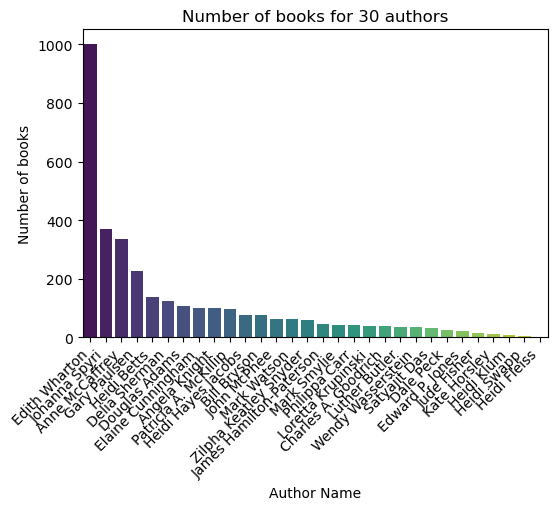

In [14]:
# to plot the number of books for each author efficiently I am going to take only first 30 authors from the dataframe df_authors

#sorting for only part of the dataframe

df_authors['number_of_books'] = [len(x) if isinstance(x, list) else 0 for x in df_authors['book_ids']]
df_authors_part = df_authors.head(30)
df_authors_part_sorted = df_authors_part.sort_values(by='number_of_books', ascending=False)

#plotting 
plt.figure(figsize=(6, 4))
sns.barplot(x='name', y='number_of_books', data=df_authors_part_sorted, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title(f'Number of books for 30 authors')
plt.xlabel('Author Name')
plt.ylabel('Number of books')
plt.show()


2. 2 # Which book has the highest number of reviews?

In [15]:
max_reviews = df_books[df_books['ratings_count'] == df_books['ratings_count'].max()]
print('The book that has the highest number of reviews:')
print(max_reviews['title'].values[0])


The book that has the highest number of reviews:
Harry Potter und der Stein der Weisen (Harry Potter,#1)


2. 3 Which are the top ten and ten worst books concerning the average score?


In [16]:
df_books_rating_sorted = df_books.sort_values(by='average_rating', ascending=False)
print('Top 10 Books with highest average ratings:')
print(df_books_rating_sorted[["title", "average_rating"]].head(10))


Top 10 Books with highest average ratings:
                                                     title  average_rating
1417207                      Techniques in Human Geography             5.0
6153769  Theatre Arts: Fundamental Theory and Practice ...             5.0
5874165  Mieux Vendre, vendre plus facilement, vendre t...             5.0
2346615                                          Traite 51             5.0
2346616                                          Traite 25             5.0
5874160                                 Personal Pleasures             5.0
5655932                                In Exchange Of Life             5.0
2346624                                            Traités             5.0
1837221  Instructor's Manual for Essentials of Anatomy ...             5.0
3080785               the roberts family guide to miracles             5.0


In [17]:
print('Top 10 books with lowest ratings:')
print(df_books_rating_sorted[["title", "average_rating"]].tail(10))

Top 10 books with lowest ratings:
                                                     title  average_rating
3013915                                      William James             0.0
1457889  NTC Vocabulary Builders, Lime Book - Reading L...             0.0
5459343  Angel Spirits 2013 Wall Calendar: The Art of S...             0.0
3013917                                      William James             0.0
3013919                                      William James             0.0
3013920                   Fussreise durch die Insel Ceilon             0.0
3013922                                              Coats             0.0
3013923                                              Coats             0.0
3013929  Sahaba: Abu Bakr, Uthman Ibn Affan, Umar, Ali,...             0.0
3513715  Die Blut-Fahne Ausgestecket Zur Warnung Politi...             0.0


2. 4 Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.


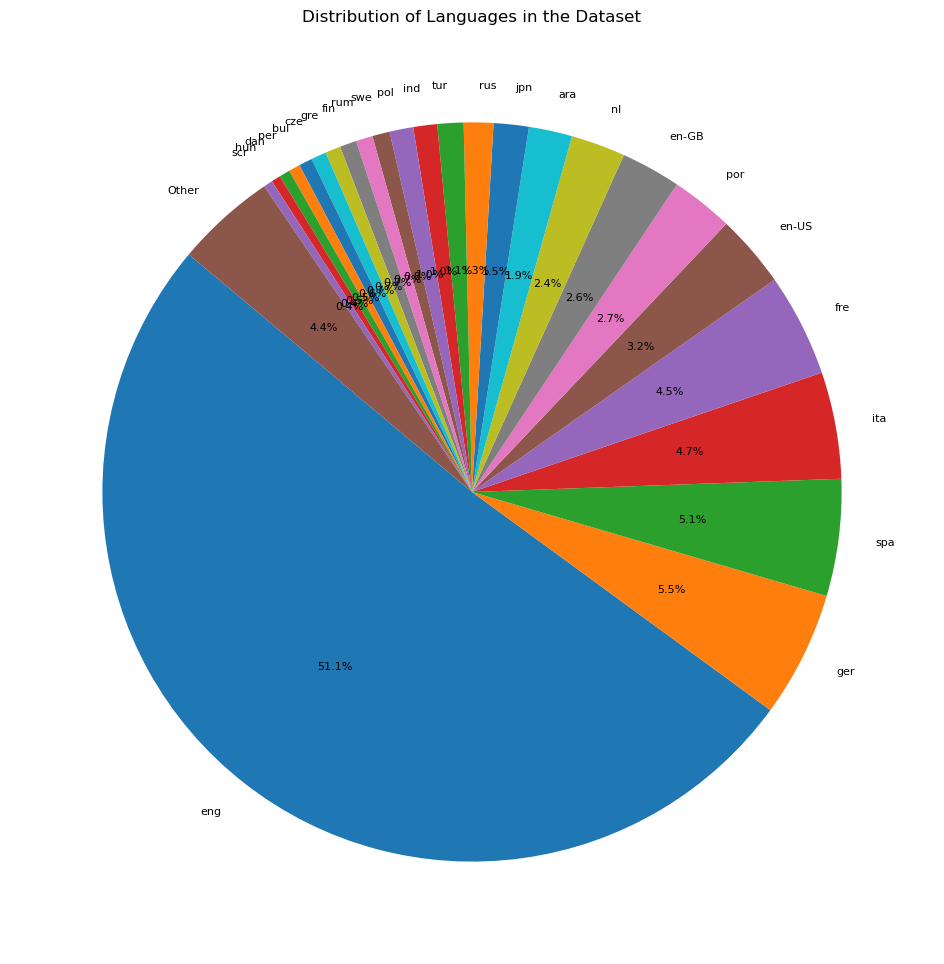

In [27]:

#All the minor language (less than 10000) labeled as Others to not to overwhelm the chart
df_books_language = df_books['language'].value_counts()
df_books_language['Other'] = df_books_language[df_books_language < 10000].sum()
df_books_language = df_books_language[df_books_language >= 10000]

plt.figure(figsize=(12, 12))
plt.pie(df_books_language, labels=df_books_language.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8})
plt.title('Distribution of Languages in the Dataset')
plt.show()



2. 5 How many books have more than 250 pages?


In [19]:

books_pages_count = len(df_books[df_books['num_pages'] > 250])
print('Number of books that have more 250 pages:')
print(books_pages_count)

Number of books that have more 250 pages:
1810335


2. 6 Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books).


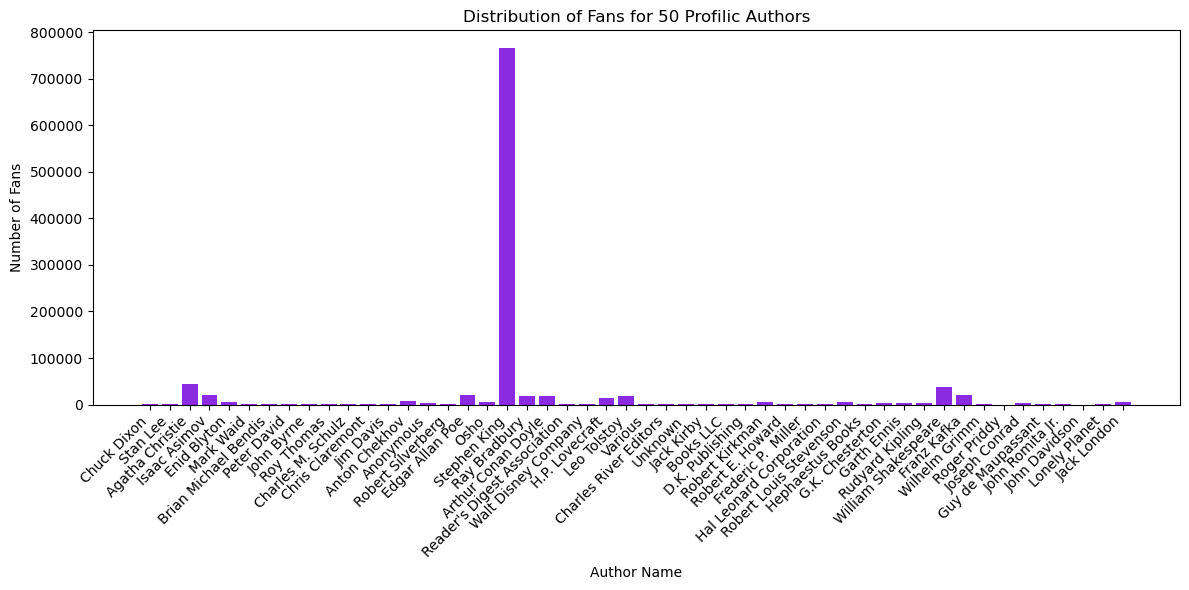

In [25]:


df_authors_sorted_50 = df_authors_sorted.head(50)

plt.figure(figsize=(12, 6))
plt.bar(df_authors_sorted_50['name'], df_authors_sorted_50['fans_count'], color='blueviolet')
plt.title('Distribution of Fans for 50 Profilic Authors')
plt.xlabel('Author Name')
plt.ylabel('Number of Fans')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### [RQ3] Let’s have a historical look at the dataset!


Write a function that takes as input a year and returns as output the following information:

- The number of books published that year.

- The total number of pages written that year.

- The most prolific month of that year.

- The longest book written that year.

In [21]:
import calendar


def get_yearly_book_info(df_books, year):

    # Number of publication in the year
    df_books_year = df_books[df_books['publication_year'] == year]
    df_books_year_sorted = df_books_year.sort_values(by = 'num_pages', ascending = False)
    number_of_books = len(df_books_year)

    # Total number of pages written in the year 
    number_of_pages = df_books_year['num_pages'].sum()

    # The most prolific month of the year
    month_counts = df_books_year['publication_month'].value_counts()
    prolific_month = calendar.month_name[int(month_counts.idxmax())]

    #The longest book written in the year
    longest_book = df_books_year_sorted.loc[df_books_year_sorted['num_pages'].idxmax(), 'title']

    return number_of_books, number_of_pages, prolific_month, longest_book


year = int(input("Enter a year:"))
yearly_info = get_yearly_book_info(df_books, year)
print(yearly_info)


(34111, 5897264, 'January', 'تفسير الشعراوي 6 خواطر فضيلة الشيخ محمد متولي الشعراوي حول القرآن الكريم')


In [2]:
# #ChatGPT Response: It shows an error

# def get_yearly_book_info(books, target_year):
#     # Initialize variables to store information
#     num_books_published = 0
#     total_pages_written = 0
#     month_counts = {}
#     longest_book = {'title': '', 'num_pages': 0}

#     # Iterate through the books to gather information for the specified year
#     for book in books:
#         if book['publication_year'] == target_year:
#             # Count the number of books published
#             num_books_published += 1

#             # Count the total number of pages written
#             total_pages_written += book['num_pages']

#             # Count the number of books published in each month
#             month = book['publication_month']
#             month_counts[month] = month_counts.get(month, 0) + 1

#             # Check if the current book is longer than the current longest book
#             if book['num_pages'] > longest_book['num_pages']:
#                 longest_book['title'] = book['title']
#                 longest_book['num_pages'] = book['num_pages']

#     # Find the most prolific month
#     most_prolific_month = max(month_counts, key=month_counts.get)

#     return {
#         'num_books_published': num_books_published,
#         'total_pages_written': total_pages_written,
#         'most_prolific_month': most_prolific_month,
#         'longest_book': longest_book,
#     }

# year = int(input("Enter a year:"))
# yearly_info = get_yearly_book_info(df_books, year)
# print(yearly_info)

#### [RQ4] Quirks questions about consistency. In most cases, we will not have a consistent dataset, and the one we are dealing with is no exception. So, let's enhance our analysis.


You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?


In [23]:

epynomous_authors = df_authors[df_authors.duplicated('name', keep=False)]

if epynomous_authors.empty:
    print('There are no Epynomous Authors in the Dataset')
else:
    print('There are Epynomous Authors in the Dataset')


There are Epynomous Authors in the Dataset


#### [RQ5] We can consider the authors with the most fans to be influential. Let’s have a deeper look.


Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?


In [24]:

print('Top 10 most influential authors by fan count:')

df_authors_fanscount_sorted = df_authors.sort_values(by='fans_count', ascending=False)

print(df_authors_fanscount_sorted[["name", 'fans_count']].head(10))

print('Top 10 most influential authors by number of books:')

print(df_authors_part_sorted [["name", 'number_of_books']].head(10))

Top 10 most influential authors by fan count:
                       name  fans_count
1017           Stephen King      766035
169374        Veronica Roth      455358
6397            Bill  Gates      446876
205870       Colleen Hoover      356633
4537           Rick Riordan      339346
1161        James Patterson      317040
100166           John Green      282537
3818    Neil deGrasse Tyson      277850
27110       Cassandra Clare      238560
32358          Mindy Kaling      234647
Top 10 most influential authors by number of books:
                    name  number_of_books
5          Edith Wharton             1001
28         Johanna Spyri              370
12        Anne McCaffrey              336
7           Gary Paulsen              226
29           Heidi Betts              139
10         Delia Sherman              124
0          Douglas Adams              106
15     Elaine Cunningham               99
9          Angela Knight               99
11  Patricia A. McKillip               96
